In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the dataset into python environment

In [3]:
data=pd.read_csv(r'C:/Users/Dell/Downloads/titanic_dataset.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. Make ‘PassengerId’ as the index column

In [4]:
data=pd.read_csv(r'C:/Users/Dell/Downloads/titanic_dataset.csv',index_col='PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3. Check the basic details of the dataset

In [5]:
data.shape

(891, 11)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [7]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

# 4. Fill in all the missing values present in all the columns in the dataset

In [9]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [10]:
data['Age'] = data['Age'].fillna(data['Age'].median())

In [11]:
data['Cabin'] = data['Cabin'].fillna(data['Cabin'].mode()[0])

In [12]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [13]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

# 5. Check and handle outliers in at least 3 columns in the dataset

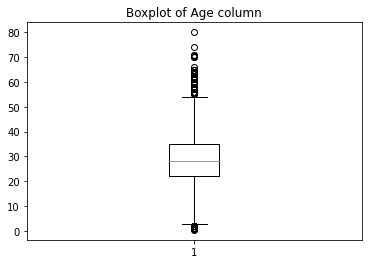

In [14]:
plt.boxplot(data['Age'])
plt.title('Boxplot of Age column')
plt.show()

In [15]:
Q1=np.percentile(data['Age'],25,interpolation='midpoint')
Q2=np.percentile(data['Age'],50,interpolation='midpoint')
Q3=np.percentile(data['Age'],75,interpolation='midpoint')

In [16]:
print(Q1)
print(Q2)
print(Q3)

22.0
28.0
35.0


In [17]:
data['Age'].median()

28.0

In [18]:
IQR=Q3-Q1
IQR

13.0

In [19]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

print(low_lim)
print(up_lim)

2.5
54.5


In [20]:
outlier = []
for x in data['Age']:
    if((x>up_lim)or (x<low_lim)):
        outlier.append(x)

In [21]:
outlier

[2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 2.0,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0]

In [22]:
ind=data['Age']>up_lim

In [25]:
data.loc[ind].index

Int64Index([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],
           dtype='int64', name='PassengerId')

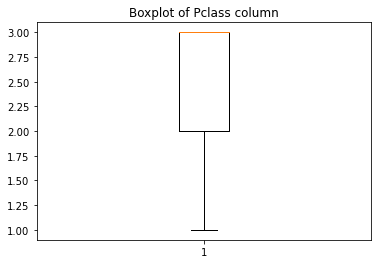

In [26]:
plt.boxplot(data['Pclass'])
plt.title('Boxplot of Pclass column')
plt.show()

In [27]:
# There is outlier for column Pclass

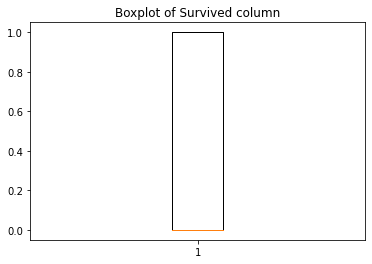

In [28]:
plt.boxplot(data['Survived'])
plt.title('Boxplot of Survived column')
plt.show()

In [29]:
# There is no outlier for column Survived

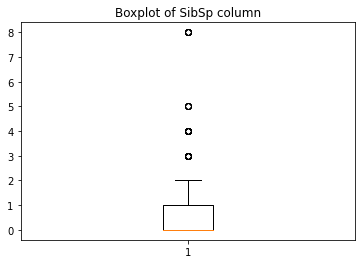

In [30]:
plt.boxplot(data['SibSp'])
plt.title('Boxplot of SibSp column')
plt.show()

In [31]:
Q1=np.percentile(data['SibSp'],25,interpolation='midpoint')
Q2=np.percentile(data['SibSp'],50,interpolation='midpoint')
Q3=np.percentile(data['SibSp'],75,interpolation='midpoint')

In [32]:
print(Q1)
print(Q2)
print(Q3)

0.0
0.0
1.0


In [33]:
data['SibSp'].median()

0.0

In [34]:
IQR=Q3-Q1
IQR

1.0

In [35]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

print(low_lim)
print(up_lim)

-1.5
2.5


In [36]:
outlier = []
for x in data['SibSp']:
    if((x>up_lim)or (x<low_lim)):
        outlier.append(x)

In [37]:
outlier

[3,
 4,
 3,
 3,
 4,
 5,
 3,
 4,
 5,
 3,
 3,
 4,
 8,
 4,
 4,
 3,
 8,
 4,
 8,
 3,
 4,
 4,
 4,
 4,
 8,
 3,
 3,
 5,
 3,
 5,
 3,
 4,
 4,
 3,
 3,
 5,
 4,
 3,
 4,
 8,
 4,
 3,
 4,
 8,
 4,
 8]

In [38]:
ind=data['SibSp']>up_lim

In [39]:
data.loc[ind].index

Int64Index([  8,  17,  25,  28,  51,  60,  64,  69,  72,  86,  89, 120, 160,
            165, 172, 177, 181, 183, 202, 230, 234, 262, 267, 279, 325, 342,
            375, 387, 410, 481, 486, 542, 543, 635, 643, 684, 687, 727, 788,
            793, 814, 820, 825, 847, 851, 864],
           dtype='int64', name='PassengerId')

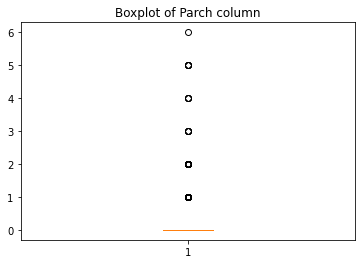

In [40]:
plt.boxplot(data['Parch'])
plt.title('Boxplot of Parch column')
plt.show()

In [41]:
Q1=np.percentile(data['Parch'],25,interpolation='midpoint')
Q2=np.percentile(data['Parch'],50,interpolation='midpoint')
Q3=np.percentile(data['Parch'],75,interpolation='midpoint')

In [42]:
print(Q1)
print(Q2)
print(Q3)

0.0
0.0
0.0


In [43]:
data['Parch'].median()

0.0

In [44]:
IQR=Q3-Q1

In [45]:
IQR

0.0

In [46]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

In [47]:
print(low_lim)
print(up_lim)

0.0
0.0


In [48]:
outlier = []
for x in data['Parch']:
    if((x>up_lim)or (x<low_lim)):
        outlier.append(x)

In [49]:
outlier

[1,
 2,
 1,
 5,
 1,
 1,
 5,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 3,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 4,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 4,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 3,
 4,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 4,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 5,
 2,
 1,
 1,
 1,
 2,
 1,
 5,
 2,
 1,
 1,
 1,
 2,
 1,
 6,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 3,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 3,
 2,
 1,
 1,
 1,
 1,
 5,
 2]

In [50]:
ind=data['Parch']>up_lim

In [51]:
data.loc[ind].index

Int64Index([  8,   9,  11,  14,  17,  25,  26,  28,  44,  51,
            ...
            856, 857, 859, 864, 870, 872, 880, 881, 886, 889],
           dtype='int64', name='PassengerId', length=213)

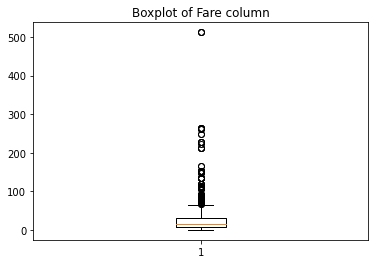

In [52]:
plt.boxplot(data['Fare'])
plt.title('Boxplot of Fare column')
plt.show()

In [53]:
Q1=np.percentile(data['Fare'],25,interpolation='midpoint')
Q2=np.percentile(data['Fare'],50,interpolation='midpoint')
Q3=np.percentile(data['Fare'],75,interpolation='midpoint')

In [54]:
print(Q1)
print(Q2)
print(Q3)

7.9104
14.4542
31.0


In [55]:
data['Fare'].median()

14.4542

In [56]:
IQR=Q3-Q1

In [57]:
IQR

23.0896

In [58]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

In [59]:
print(low_lim)
print(up_lim)

-26.724
65.6344


In [60]:
outlier = []
for x in data['Fare']:
    if((x>up_lim)or (x<low_lim)):
        outlier.append(x)

In [61]:
outlier

[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 263.0,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 146.5208,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 153.4625,
 135.6333,
 77.9583,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 75.25,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 263.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 79.2,
 78.2667,
 153.4625,
 77.9583,
 69.3,
 76.7292,
 73.5,
 113.275,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 71.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 120.0,
 93.5,
 80.0,
 83.1583,
 6

In [62]:
ind=data['Fare']>up_lim

In [63]:
data.loc[ind].index

Int64Index([  2,  28,  32,  35,  53,  62,  63,  73,  89, 103,
            ...
            793, 803, 821, 830, 836, 847, 850, 857, 864, 880],
           dtype='int64', name='PassengerId', length=116)

# 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [64]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [65]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [66]:
data2=data.drop(['Name','Sex','Cabin','Embarked','Ticket'],axis=1)
data2.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,0,3,22.0,1,0,7.2500
2,1,1,38.0,1,0,71.2833
3,1,3,26.0,0,0,7.9250
4,1,1,35.0,1,0,53.1000
5,0,3,35.0,0,0,8.0500


In [67]:
X=data2.drop('Survived',axis=1)
y=data2['Survived']

In [68]:
from sklearn.preprocessing import MinMaxScaler

In [69]:
min_max_scaler=MinMaxScaler(feature_range=(0,1))

In [70]:
X=min_max_scaler.fit_transform(X)

In [71]:
type(X)

numpy.ndarray

In [72]:
X

array([[1.        , 0.27117366, 0.125     , 0.        , 0.01415106],
       [0.        , 0.4722292 , 0.125     , 0.        , 0.13913574],
       [1.        , 0.32143755, 0.        , 0.        , 0.01546857],
       ...,
       [1.        , 0.34656949, 0.125     , 0.33333333, 0.04577135],
       [0.        , 0.32143755, 0.        , 0.        , 0.0585561 ],
       [1.        , 0.39683338, 0.        , 0.        , 0.01512699]])

In [73]:
X=pd.DataFrame(X,columns=['Pclass','Age','SibSp','Parch','Fare'])

In [74]:
X.head()

,Pclass,Age,SibSp,Parch,Fare
0,1.0,0.271174,0.125,0.0,0.014151
1,0.0,0.472229,0.125,0.0,0.139136
2,1.0,0.321438,0.000,0.0,0.015469
3,0.0,0.434531,0.125,0.0,0.103644
4,1.0,0.434531,0.000,0.0,0.015713


In [75]:
X.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.654321,0.363679,0.065376,0.063599,0.062858
std,0.418036,0.163605,0.137843,0.134343,0.096995
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.271174,0.000000,0.000000,0.015440
50%,1.000000,0.346569,0.000000,0.000000,0.028213
75%,1.000000,0.434531,0.125000,0.000000,0.060508
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [76]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [77]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

lr=LinearRegression()
model=lr.fit(X_train,y_train)
predctions=model.predict(X_test)

In [78]:
from sklearn.metrics import mean_squared_error,r2_score

In [79]:
print('Mean squared error is:',mean_squared_error(y_test,predctions))
print('R squared value is:',r2_score(y_test,predctions))

Mean squared error is: 0.1869278524055185
R squared value is: 0.2291691996235239
